In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split




In [29]:
np.random.seed(0)

X, y = datasets.make_circles(n_samples=1000, factor=.3, noise=0.25)

Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

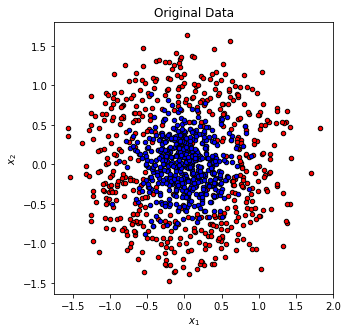

In [30]:
plt.figure()
plt.subplots(1,1,figsize=(5,5))
# plt.subplot(1,2,3, projection='polar')
plt.title("Original Data")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [36]:
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1,max_iter=1000)
clf_nb =  GaussianNB()
clf_svc = SVC(kernel='rbf',C=1 , gamma=100,probability=True)
clf_knn = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')
clf_rfc = RandomForestClassifier(random_state=1, n_estimators=100)

pipe_mlp = Pipeline([['sc', StandardScaler()],
                  ['clf', clf_mlp]])
pipe_svc= Pipeline([['sc', StandardScaler()],
                  ['clf', clf_svc]])
pipe_nb = Pipeline([['sc', StandardScaler()],
                  ['clf', clf_nb]])
pipe_knn = Pipeline([['sc', StandardScaler()],
                  ['clf', clf_knn]])


clf_labels = ['MLPClassifier', 'SVC', 'Naive Bayes','KNN','Random Forest']

print('10-fold cross validation:\n')
for clf, label in zip([pipe_mlp, pipe_svc, pipe_nb,pipe_knn,clf_rfc], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.97 (+/- 0.02) [MLPClassifier]
ROC AUC: 0.90 (+/- 0.04) [SVC]
ROC AUC: 0.97 (+/- 0.02) [Naive Bayes]
ROC AUC: 0.85 (+/- 0.04) [KNN]
ROC AUC: 0.95 (+/- 0.02) [Random Forest]


In [37]:
# Majority Rule (hard) Voting
from sklearn.ensemble import VotingClassifier

mv_clf = VotingClassifier(estimators=[clf_mlp, pipe_svc, pipe_nb,pipe_knn,clf_rfc])

clf_labels += ['Majority voting']
all_clf = [clf_mlp, pipe_svc, pipe_nb,pipe_knn,clf_rfc]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.97 (+/- 0.02) [MLPClassifier]
ROC AUC: 0.90 (+/- 0.04) [SVC]
ROC AUC: 0.97 (+/- 0.02) [Naive Bayes]
ROC AUC: 0.85 (+/- 0.04) [KNN]
ROC AUC: 0.95 (+/- 0.02) [Random Forest]


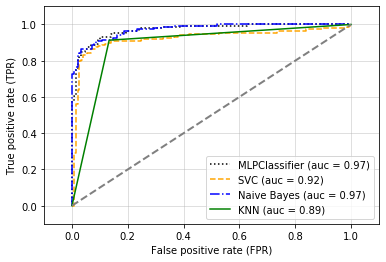

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green','red']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('images/07_04', dpi=300)
plt.show()